In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
    return 3*x**2 - 4*x+5 

In [6]:
f(3.0)

20.0

In [7]:
xs=np.arange(-5,5,0.25) # -5 to 5 with step of 0.25
xs 

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

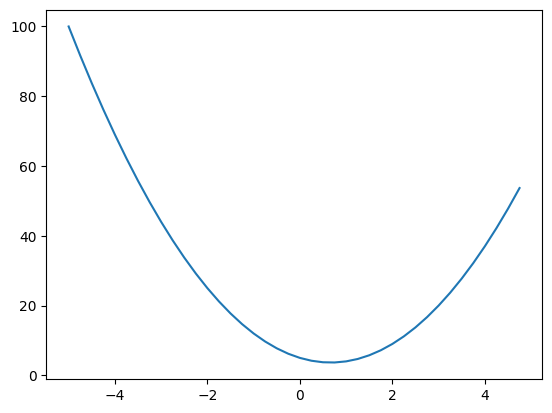

In [9]:
plt.plot(xs,ys) #a nice parabola

In [10]:
h=0.000000001 #slight change that can manipulate our func
x=2/3
(f(x+h)-f(x))/h # normalizing the rise over run (change in y divided by x)

0.0

In [11]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [12]:
h=0.00001
#inputs
a=2.0
b=-3.0
c=10.0

d1=a*b+c
a+=h
d2=a*b+c #a is slightly bumped up with h for this

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


the derivavtive of a function at a point measures how the function's output chnages as its input changes, this shows real application in ml , optimization and numerical analysis

In [13]:
#bumping b now
h=0.00001
#inputs
a=2.0
b=-3.0
c=10.0

d1=a*b+c
b+=h
d2=a*b+c #a is slightly bumped up with h for this

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.00002
slope 2.0000000000131024


In [14]:
#bumping c now
h=0.00001
#inputs
a=2.0
b=-3.0
c=10.0

d1=a*b+c
c+=h
d2=a*b+c #a is slightly bumped up with h for this

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.00001
slope 0.9999999999621422


## building a value object

In [15]:
class Value:
    def __init__(self, data, _children=(), _op='',label=''):
        self.data = data
        self.grad=0.0
        self._prev = set(_children)
        self._op = _op
        self.label=label
    
    def __repr__(self): # wrapper to print out nicer looking python expression
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*')
        return out

#example
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e=a*b;e.label='e'
d = e+c
d.label='d'
f=Value(-2.0,label='f')
L=d*f
L.label='L'
L

Value(data=-8.0)

In [16]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [17]:
d._op

'+'

In [18]:
! pip install micrograd

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

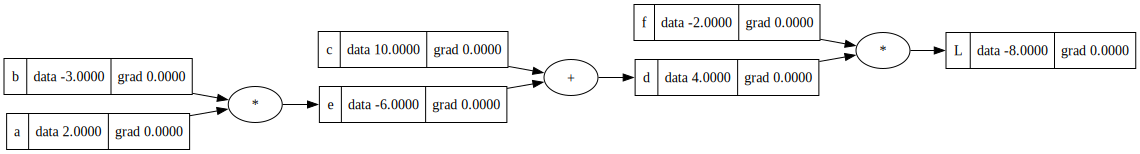

In [20]:
draw_dot(L)

In [21]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0
        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+')
        return out

    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        return out
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')
        return out

#example
a=Value(data=2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b
e.label='e'
d=e+c
d.label='d'
f=Value(-2.0,label='f')
L=d*f
L.label='L'
L

Value(data=-8.0)

In [22]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

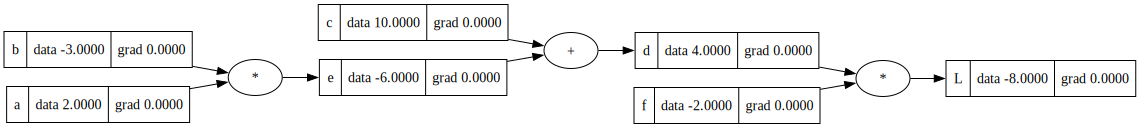

In [23]:
draw_dot(L)

In [24]:
L.grad=1 

In [25]:
def lol():
    h=0.0001

    a=Value(2.0,label='a')
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a') # adding h to a, measuring the deriative of L w.r.t. a
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h) # rise over run (deriative of L w.r.t. a)

lol()


6.000000000021544


In [26]:
f.grad=4.0
d.grad=-2.0

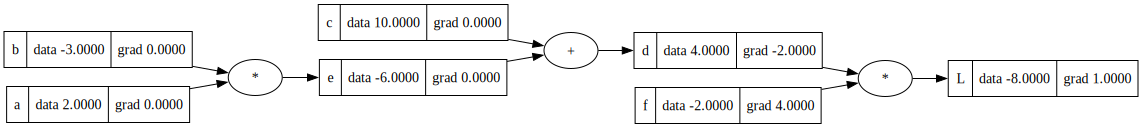

In [27]:
draw_dot(L)

In [28]:
c.grad=-2.0
e.grad=-2.0 #similar to c

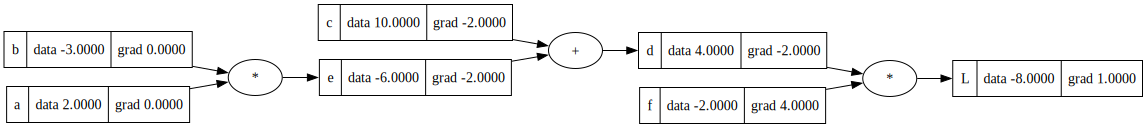

In [29]:
draw_dot(L)

In [30]:
a.grad=6.0
b.grad=-4.0

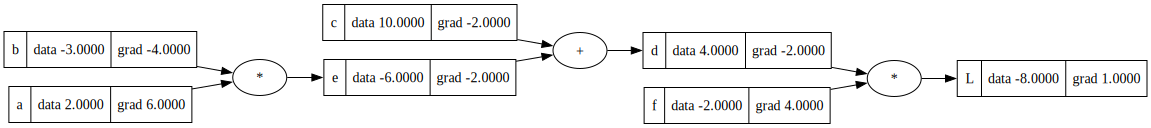

In [31]:
draw_dot(L)

## manual propagation 
### neural network

In [32]:
import math

x1=Value(2.0, label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

#bias of neuron
b=Value(6.8813, label='b')

x1w1=x1*w1 ;x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1 +x2w2; x1w1x2w2.label='x1*w1 + x2*w2' 
n=x1w1x2w2+b; n.label='n'  # this is real neural net (x1w1 +x2w2 +b)
o=n.tanh(); o.label='o'

In [33]:
o.grad=1.0

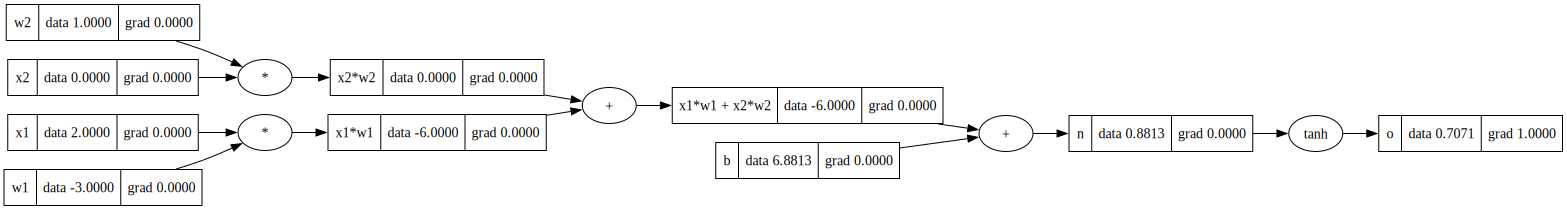

In [34]:
draw_dot(o)

In [35]:
n.grad=0.5 #1-o.data**2 is 0.5

In [36]:
x1w1x2w2.grad=0.5
b.grad=0.5

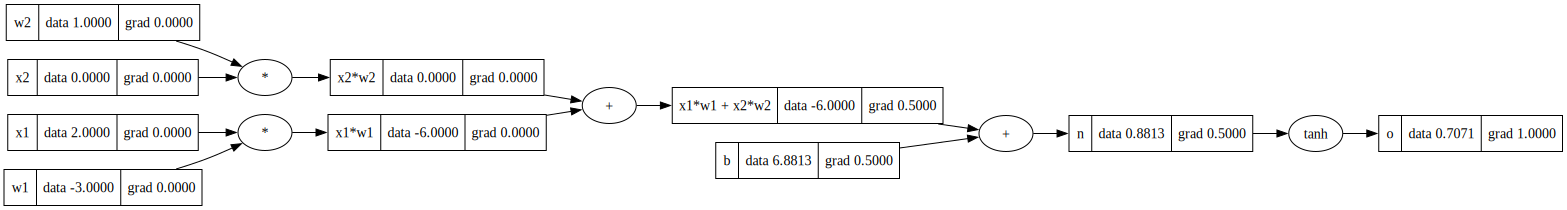

In [37]:
draw_dot(o)

#### with same exact logic gradients of both x2w2 and x1w1 is 0.5

In [38]:
x1w1.grad=0.5
x2w2.grad=0.5

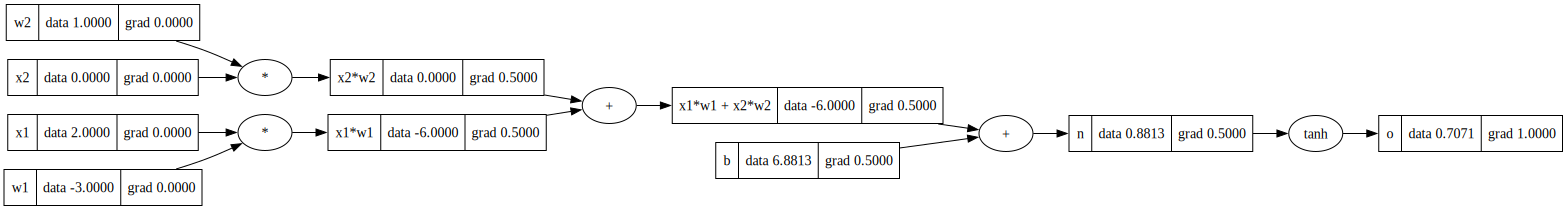

In [39]:
draw_dot(o)

In [40]:
x2.grad=x2w2.grad * w2.data

#same logic
w2.grad=x2w2.grad * x2.data

x2.grad, w2.grad

(0.5, 0.0)

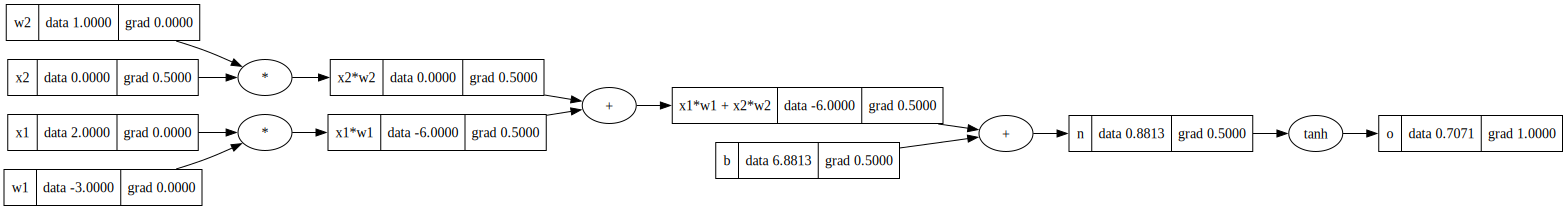

In [41]:
draw_dot(o)

In [42]:
x1.grad=x1w1.grad * w1.data
w1.grad=x1w1.grad * x1.data

x1.grad, w1.grad

(-1.5, 1.0)

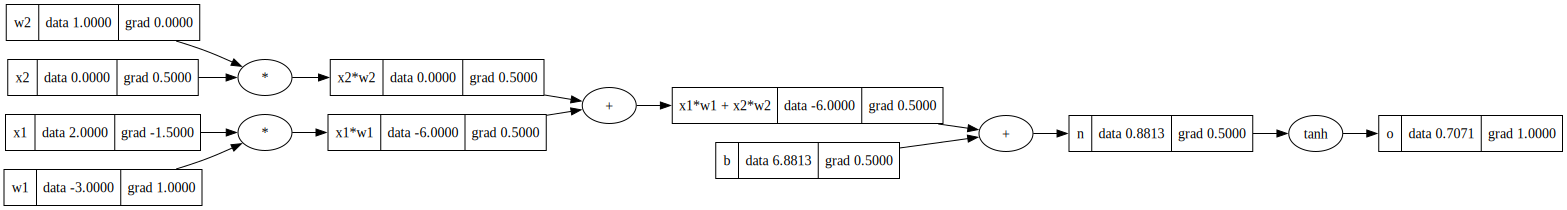

In [43]:
draw_dot(o)

implementing the backward function for each operation,
 again chain rule 

In [44]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0
        #addition:
        self._backward = lambda: None
        
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward    
        return out
    
    # addition of tanh
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * 1 
        out._backward = _backward
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [45]:
import math

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

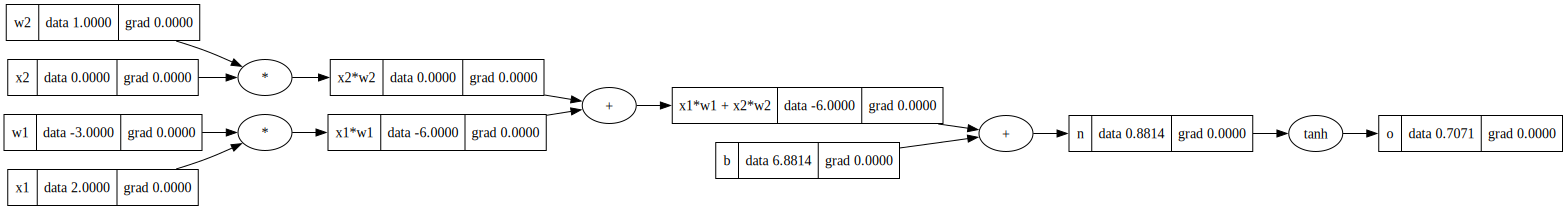

In [46]:
draw_dot(o)

In [47]:
o.grad=1

In [48]:
o._backward() #propagates the grad through tanh(n)

#0.5 get pushed to n


In [49]:
n._backward()

In [50]:
b._backward() #nothing happens because b is in leaf node

In [51]:
x1w1x2w2._backward() #grad of 0.5 on each nodes

In [52]:
x1w1._backward()
x2w2._backward()

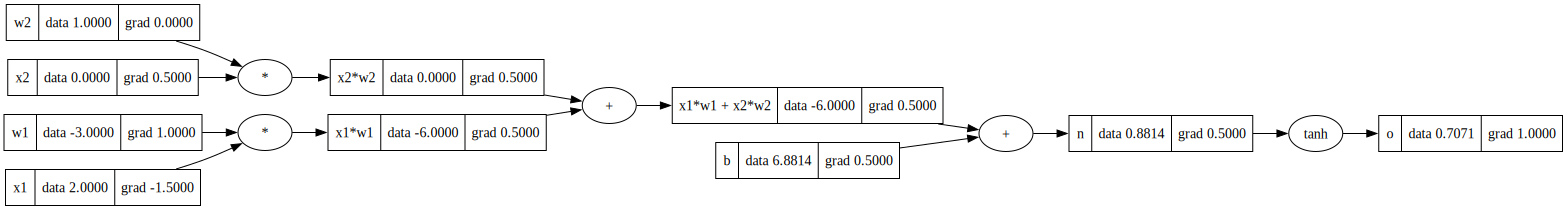

In [53]:
draw_dot(o)

In [54]:
#by topologiccal sort , we have been doing manual backpropagation so far , and have to call _backward for getting grad value 
#so when we automate it, we can't expect neuron to simply sort from right to left on it's own

In [55]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v) 

build_topo(o)

for node in reversed(topo): # revsersing topo so that it would be from right to left instead of left to right
    node._backward()

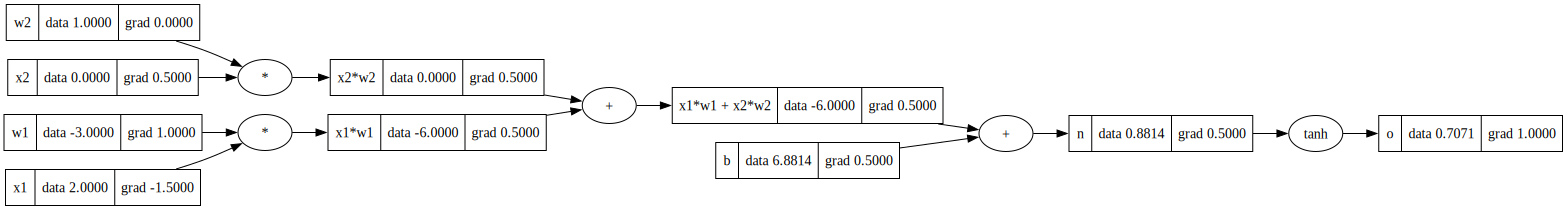

In [56]:
draw_dot(o)

In [57]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward    
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * 1
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

    
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [58]:
import math

x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

#Bias
b=Value(6.8813, label='b')

x1w1=x1*w1 ;x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1 +x2w2; x1w1x2w2.label='x1*w1 + x2*w2' 
n=x1w1x2w2+b; n.label='n'  # this is real neural net (x1w1 +x2w2 +b)
o=n.tanh(); o.label='o'

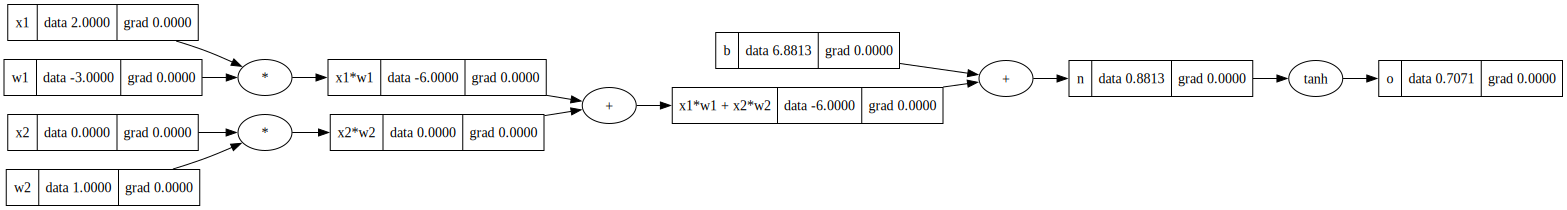

In [59]:
draw_dot(o)

In [60]:
o._backward()

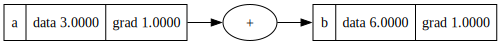

In [61]:
a=Value(3.0,label='a')
b=a+a;b.label='b'
b.backward()
draw_dot(b)



In [62]:
#adding grad instead of overwritting them
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0
        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad ##accumlating the gradients
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad +=out.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    #addition of tanh
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1 #derivative of tanh(n)
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()

#example
a=Value(data=2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b
e.label='e'
d=e+c
d.label='d'
f=Value(-2.0,label='f')
L=d*f
L.label='L'
L

Value(data=-8.0)

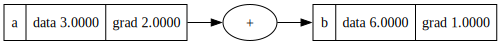

In [63]:
a=Value(3.0,label='a')
b=a+a; b.label='b'
b.backward()
draw_dot(b)

In [64]:
#leaving clean Values class for moving forward

class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0
        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad ##accumlating the gradients
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad +=out.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    #addition of tanh
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1 #derivative of tanh(n)
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()

#without variables

In [65]:
#breaking tanh into its individual operations 
#instead of making it single operation
#for better learning purposes 

#ensuring that we can add nummbers an floats to variables directly
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0

        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other=other if isinstance(other, Value) else Value(other) # ensures we can add numbers to variables directly

        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad 
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)

        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad +=out.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()



In [66]:
a=Value(2.0)
a+1, a*2

#2*a will not work here (need to use __remul__ method)

(Value(data=3.0), Value(data=4.0))

In [67]:
class Value:

    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0

        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other=other if isinstance(other, Value) else Value(other) # ensures we can add numbers to variables directly

        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad 
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)

        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad +=out.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()



In [68]:
a=Value(2.0)
2*a  

Value(data=4.0)

In [69]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0

        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other=other if isinstance(other, Value) else Value(other) # ensures we can add numbers to variables directly

        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad 
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)

        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad +=out.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1
        out._backward=_backward
        return out
    
    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad+=out.data+out.grad
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()



In [70]:
a=Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [71]:
#implementing division
#a/b=a*(1/b)=a*b^-1

In [72]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0

        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other=other if isinstance(other, Value) else Value(other) 
        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad 
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)

        out=Value(self.data*other.data,(self,other),'*')

        def _backward():
            self.grad +=other.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    def __pow__(self,other): #addition of power function
        assert isinstance(other,(int,float)),"only supporting int/fload powers for now"
        out=Value(self.data**other,(self,),f'**{other}')

        def _backward():
            self.grad+=other* (self.data** (other-1)) *out.grad #derivative

        out._backward=_backward
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def __truediv__(self,other):
        return self *other**-1 #a/b =a*(1/b)=a*b^-1
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1
        out._backward=_backward
        return out
    
    def exp(self): #addition of exp function
        x=self.data
        out=Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad+=out.data * out.grad
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()



In [73]:
a=Value(2.0)
b=Value(4.0)

a/b

Value(data=0.5)

In [74]:
#implementing subtraction function
#a-b=a+(-b)

In [75]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self.grad=0.0

        self._backward=lambda:None

        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other=other if isinstance(other, Value) else Value(other) 
        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad +=1*out.grad 
            other.grad +=1*out.grad 

        out._backward=_backward
        return out

    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)

        out=Value(self.data*other.data,(self,other),'*')

        def _backward():
            self.grad +=other.data*out.grad
            other.grad +=self.data*out.grad

        out._backward=_backward
        return out
    
    def __pow__(self,other): #addition of power function
        assert isinstance(other,(int,float)),"only supporting int/fload powers for now"
        out=Value(self.data**other,(self,),f'**{other}')

        def _backward():
            self.grad+=other* (self.data** (other-1)) *out.grad #derivative

        out._backward=_backward
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def __radd__(self,other):
        return self+other
    
    def __truediv__(self,other):
        return self *other**-1 #a/b =a*(1/b)=a*b^-1
    
    def __neg__(self): #negation 
        return self*-1 
    
    def __sub__(self,other):
        return self+(-other) #a-b=a+(-b)
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*1
        out._backward=_backward
        return out
    
    def exp(self): #addition of exp function
        x=self.data
        out=Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad+=out.data * out.grad
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0

        for node in reversed(topo):
            node._backward()



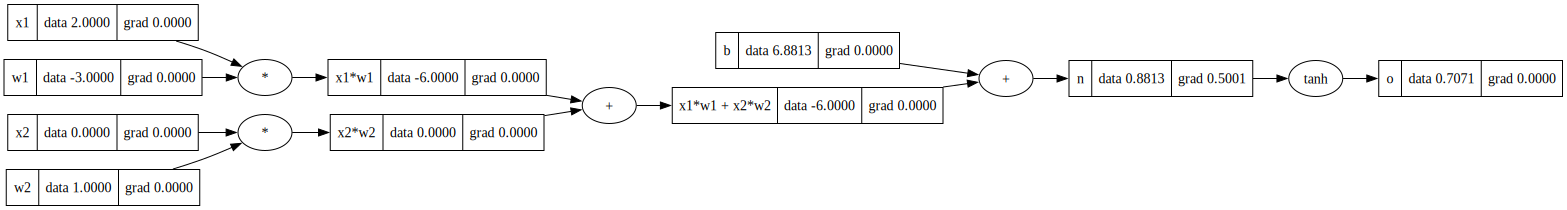

In [76]:
draw_dot(o)

#### breakup tanh into individual operations.

tanh(x)=e^2x-1/e^2x+1

In [77]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

#Bias
b=Value(6.8813, label='b')

x1w1=x1*w1 ;x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1 +x2w2; x1w1x2w2.label='x1*w1 + x2*w2' 
n=x1w1x2w2+b; n.label='n'  # this is real neural net (x1w1 +x2w2 +b)

e=(2*n).exp() # this means e=exp to power of 2n
# since tanh(n) is o:
o=(e-1)/(e+1)
o.backward()

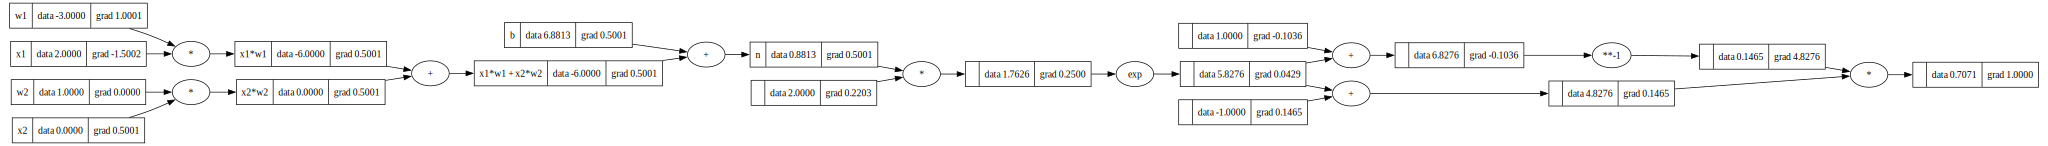

In [78]:
draw_dot(o)

exactly same as tanh formula , but broken down into individual operations of:
- e^2x as exp
- e^2x +1 as +
- e^2x +1/e^2x -1 as **-1

this means it doesn't really matter that how muc be broke down the operations, as long as we can calculate gradients and are able to do forward as well backward passes.

### exact with pytorch

In [79]:
import torch

In [80]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print('o:', o.item())
o.backward()

print('-----')
print('x2:', x2.grad.item())
print('w2:', w2.grad.item())
print('x1:', x1.grad.item())
print('w1:', w1.grad.item())

o: 0.7071066904050358
-----
x2: 0.5000001283844369
w2: 0.0
x1: -1.5000003851533106
w1: 1.0000002567688737


## building out a MLP in micrograd

#### starting with single individual neuron

- nin = number of inputs
- nout = number of outputs

In [83]:
import random

In [84]:
class Neuron:
    def __init__(self, nin):
        self.w= [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b= Value(random.uniform(-1,1))

    def __call__(self,x):
        #w*x+b
        act=sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out= act.tanh()
        return out
    
class Layer:
    def __init__(self, nin,nout):
        self.neurons=[Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        outs=[n(x) for n in self.neurons]
        return outs[0] if len(outs) ==1 else outs

class MLP:  # instead of single input taking list of inputs, the list defines the size of all layer in our mlp
    def __init__(self, nin , nouts):
        sz=[nin]+nouts
        self.layers=[Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x=layer(x)
        return x

x=[2.0,3.0, -1.0]
n=MLP(3,[4,4,1])
n(x)

Value(data=-0.8947254629453444)

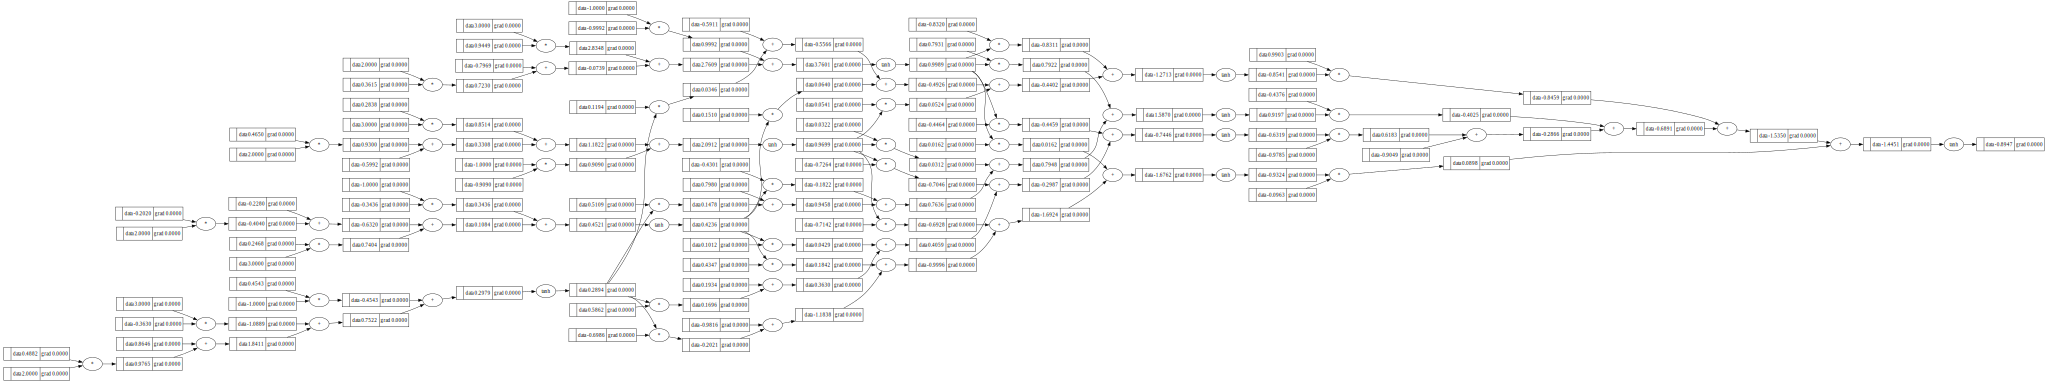

In [85]:
draw_dot(n(x))

### creating a tiny dataset and 

In [86]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] #desired targets

ypred = [n(x) for x in xs] #predicted output

ypred

[Value(data=-0.8947254629453444),
 Value(data=-0.9484629332348611),
 Value(data=-0.9716825372488618),
 Value(data=-0.9246998098569565)]

In [89]:
# min loss

loss =sum((yout -ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=7.297911885944272)

In [90]:
loss.backward()

In [92]:
n.layers[0].neurons[0].w[0].grad

2.7800656697700754

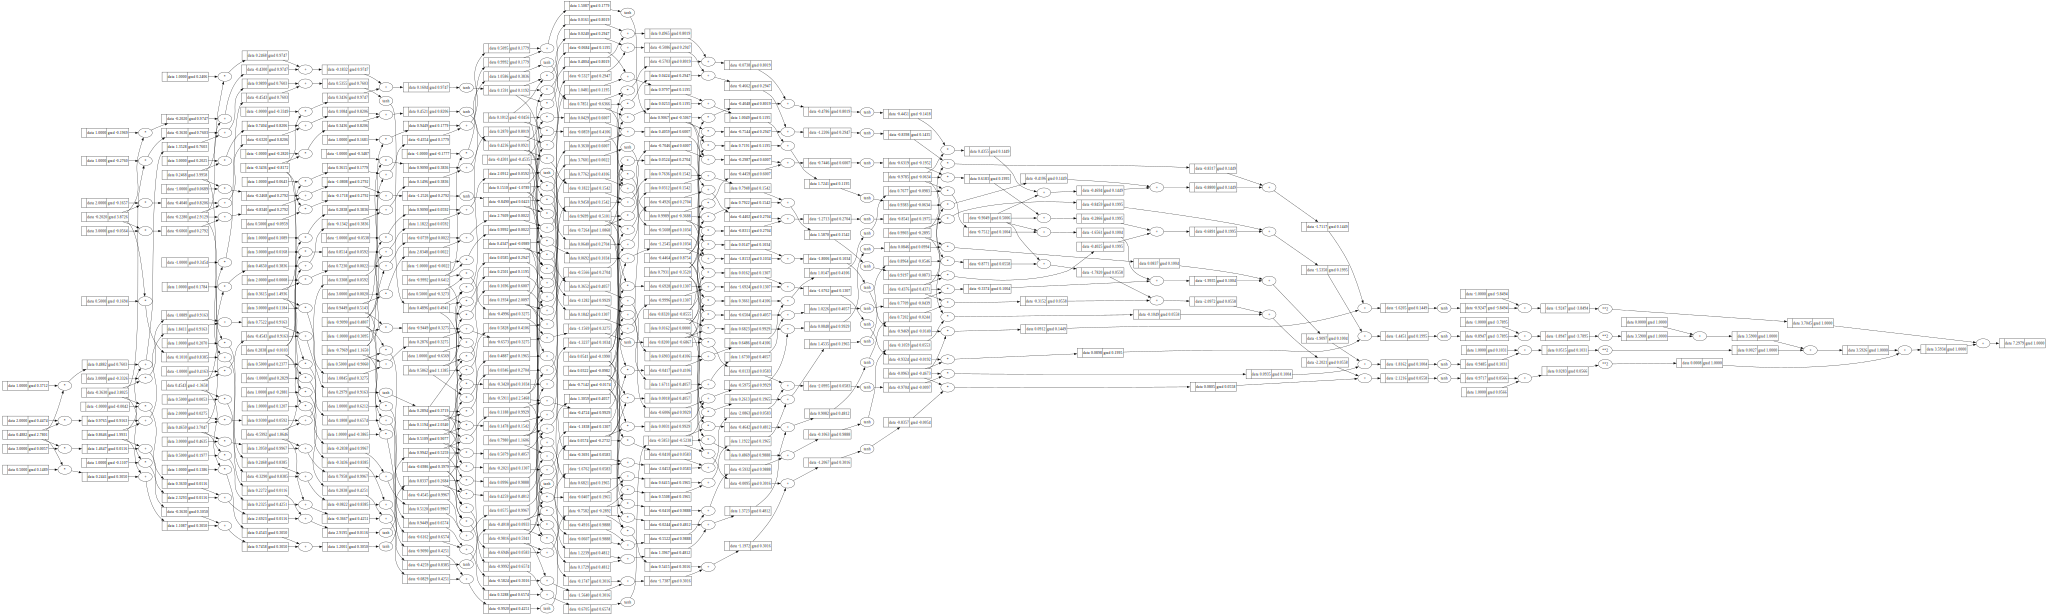

In [93]:
draw_dot(loss)